In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

df = pd.read_csv('/Users/makusli/Desktop/1. Data Science Notes/Homework/WHO suicide statistics/who_suicide_statistics.csv')
df.fillna(0, inplace=True)
print(df.head())

   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          0.0    277900.0
1  Albania  1985  female  25-34 years          0.0    246800.0
2  Albania  1985  female  35-54 years          0.0    267500.0
3  Albania  1985  female   5-14 years          0.0    298300.0
4  Albania  1985  female  55-74 years          0.0    138700.0


Text(0.5, 1.0, 'Total Suicides per Year')

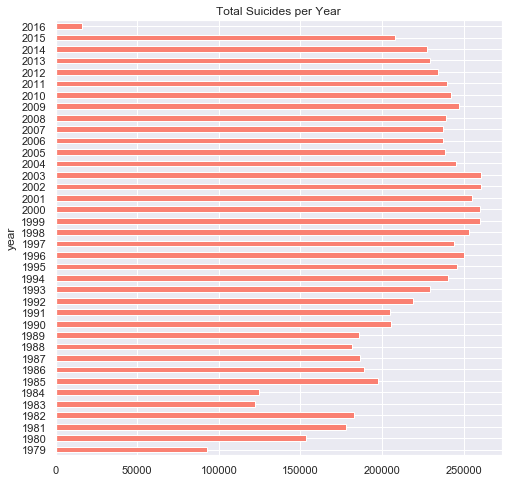

In [53]:
#Total Suicides per year
df.groupby('year').suicides_no.sum().plot(kind = 'barh', figsize = (8,8), color = 'salmon')
plt.title('Total Suicides per Year')

Text(0.5, 1.0, 'Total Suicides per Country')

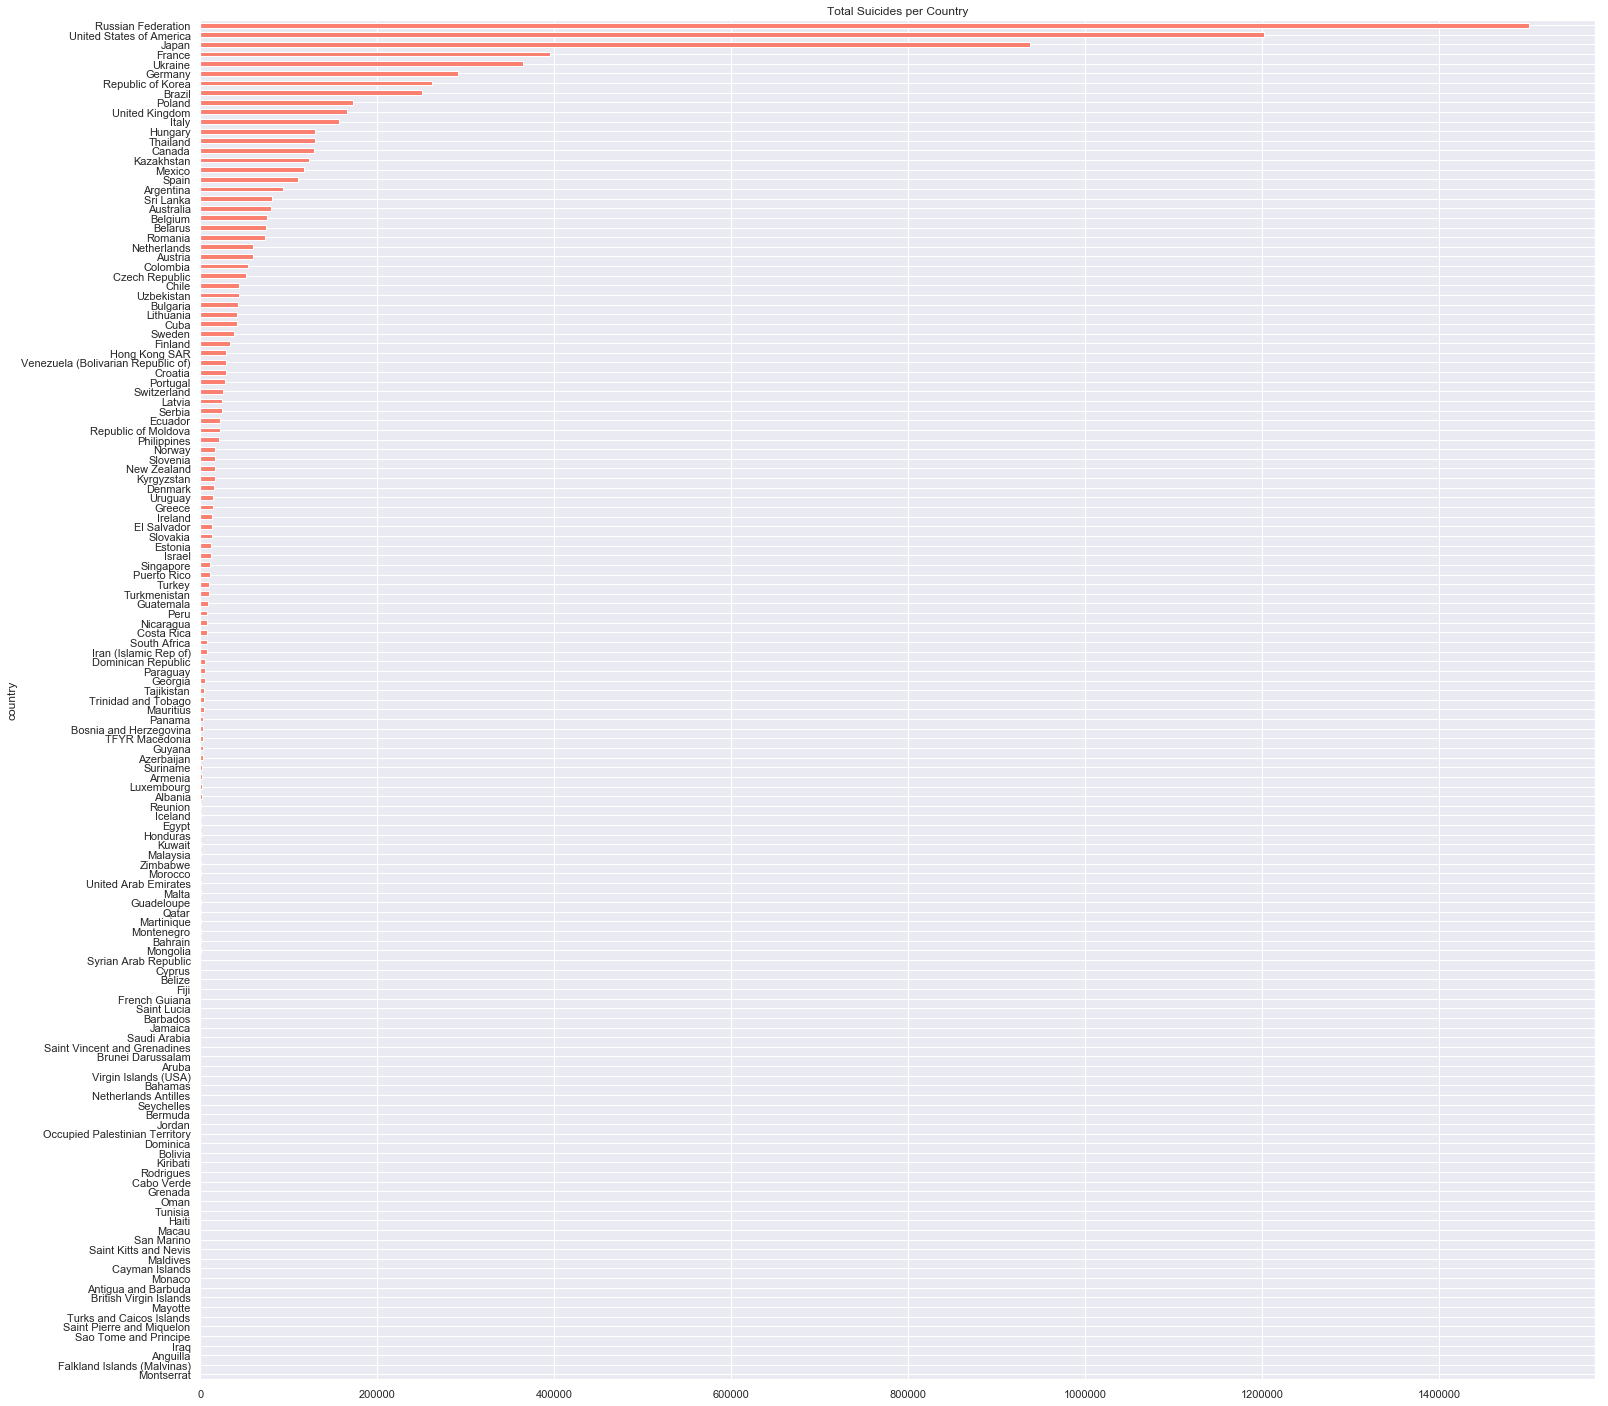

In [98]:
df.groupby('country').suicides_no.sum().sort_values(ascending = True).plot(kind = 'barh', figsize = (25,25), color = 'salmon')
plt.title('Total Suicides per Country')

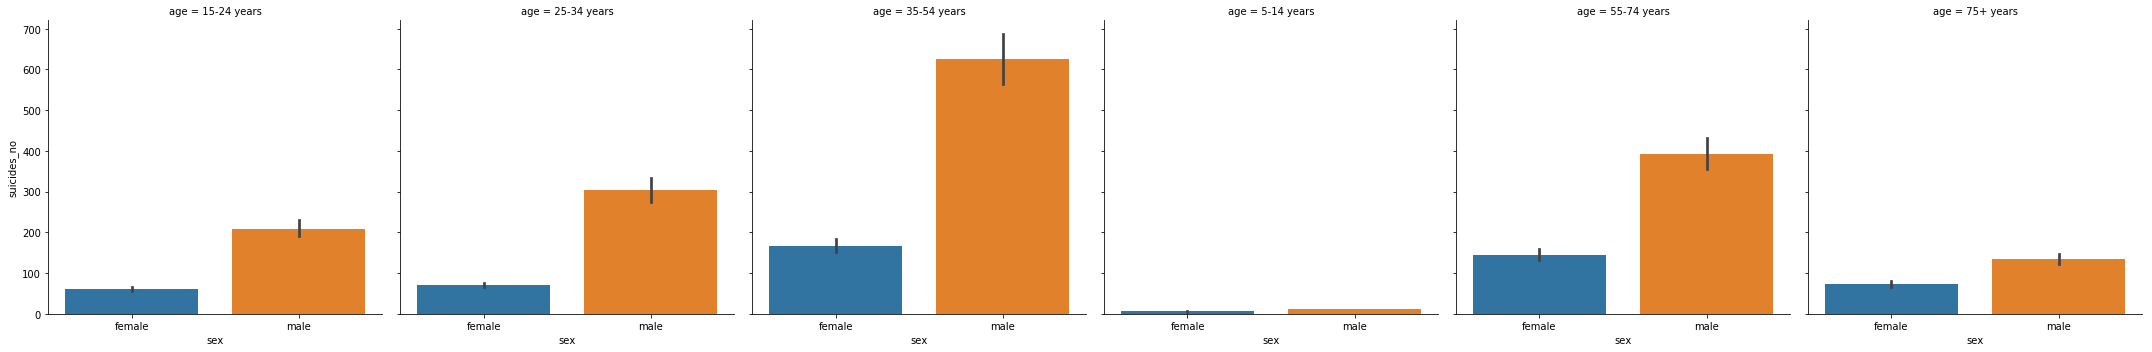

In [8]:
#Number of suicides per gender per age range
sns.catplot(x = 'sex', y = 'suicides_no', col = 'age', data = df, kind = 'bar')
plt.show()

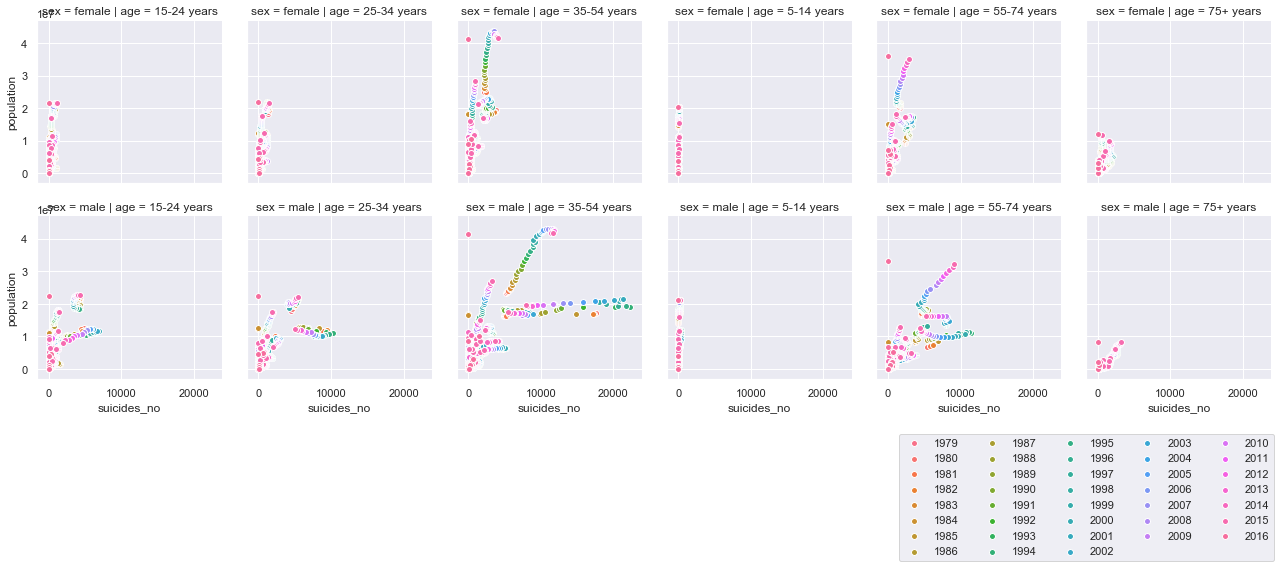

In [18]:
#Scatter plot of suicides against population for each age range & gender
sns.set(style = 'darkgrid')
g = sns.FacetGrid(df, row = 'sex', col = 'age', hue = 'year')
g.map(plt.scatter, "suicides_no","population", edgecolor = 'white')
plt.legend(loc='upper center', bbox_to_anchor=(0, -0.30), ncol=5)

[[1749.2052741]] [-3282815.03501477]


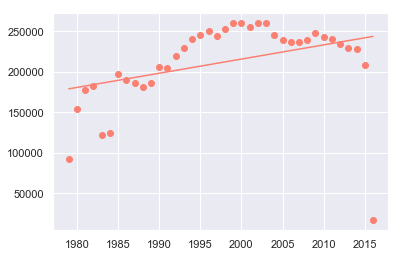

In [5]:
#Linear regression for deaths over the years
df2 = df.groupby('year').suicides_no.sum().reset_index()
#change into an numpy array
X2 = np.array(df2.year)
y2 = np.array(df2.suicides_no)
#reshape into an 2d array
X2=X2.reshape(-1,1)
y2=y2.reshape(-1,1)

plt.scatter(X2,y2, color = 'salmon')

regr.fit(X2,y2)
print(regr.coef_, regr.intercept_)

y2_predict = regr.predict(X2)
plt.plot(X2, y2_predict, color='salmon')
plt.show()
#An unfortunate climb of deaths worldwide over the years. I believe the numbers for 2016 is unfinished, creating a low outlier

[[-10.17297297]] [62014.73573574]
[[195.3092242]] [-358514.35955794]
[[246.91014699]] [-467738.6446183]


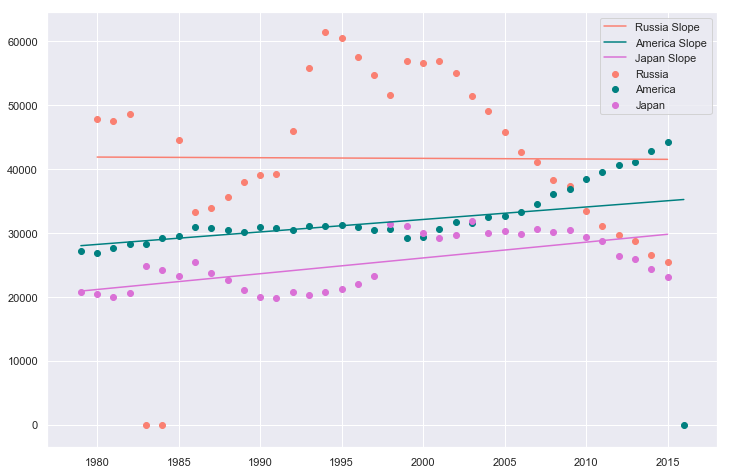

In [4]:
#Linear Regression for top 3 countries with highest suicide numbers

plt.figure(figsize=(12,8))

        #RUSSIAAAAA
#Linear regression for Russia
rdf = df[df.country == 'Russian Federation']
rdf = rdf.groupby('year').suicides_no.sum().reset_index()
#change into an numpy array
rx = np.array(rdf.year)
ry = np.array(rdf.suicides_no)
#reshape into an 2d array
rx=rx.reshape(-1,1)
ry=ry.reshape(-1,1)

plt.scatter(rx,ry, color = 'salmon')

regr.fit(rx,ry)
print(regr.coef_, regr.intercept_)

ry_predict = regr.predict(rx)
plt.plot(rx, ry_predict, color='salmon')


        #AMERICAAAAAAA
#Linear regression for America
udf = df[df.country == 'United States of America']
udf = udf.groupby('year').suicides_no.sum().reset_index()
#change into an numpy array
ux = np.array(udf.year)
uy = np.array(udf.suicides_no)
#reshape into an 2d array
ux=ux.reshape(-1,1)
uy=uy.reshape(-1,1)

plt.scatter(ux,uy, color = 'teal')

regr.fit(ux,uy)
print(regr.coef_, regr.intercept_)

uy_predict = regr.predict(ux)
plt.plot(ux, uy_predict, color='teal')

        #JAPAN
#Linear regression for JAPAN
jdf = df[df.country == 'Japan']
jdf = jdf.groupby('year').suicides_no.sum().reset_index()
#change into an numpy array
jx = np.array(jdf.year)
jy = np.array(jdf.suicides_no)
#reshape into an 2d array
jx=jx.reshape(-1,1)
jy=jy.reshape(-1,1)

plt.scatter(jx,jy, color = 'orchid')

regr.fit(jx,jy)
print(regr.coef_, regr.intercept_)

jy_predict = regr.predict(jx)
plt.plot(jx, jy_predict, color='orchid')
plt.legend(['Russia Slope', 'America Slope', 'Japan Slope', 'Russia', 'America', 'Japan'], loc = 1)
plt.show()

#slight decline in deaths for Russia
#An ascending slope for America
#A steeper rise for Japan

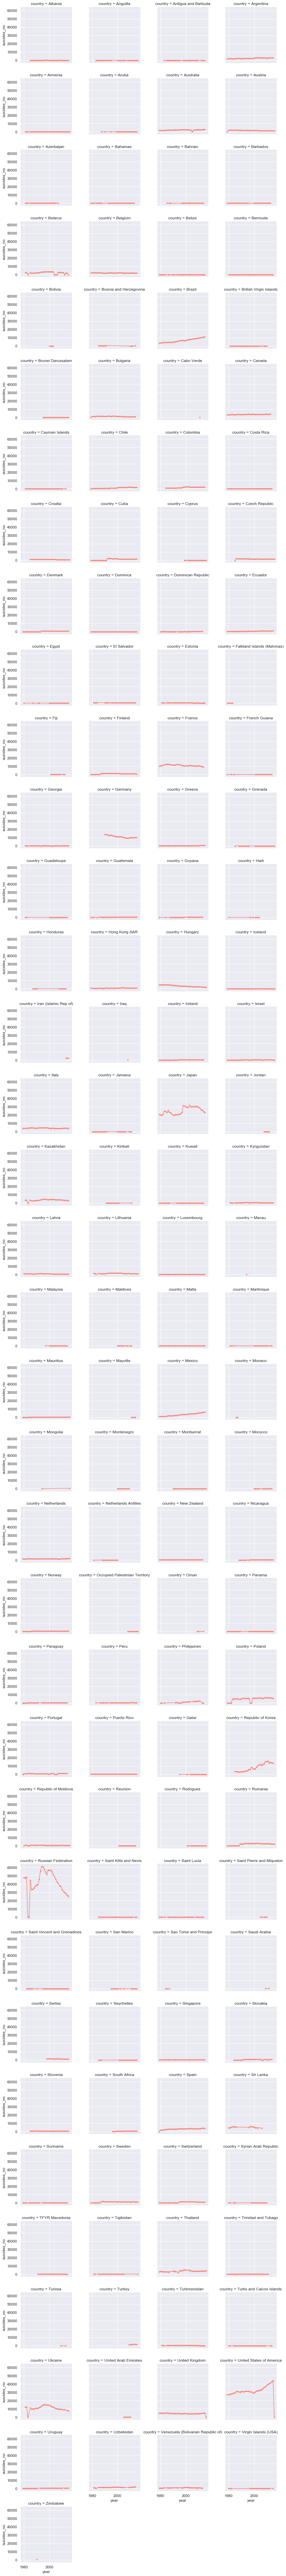

In [3]:
#Number of suicides over the years for each country
df3 = df.groupby(['country', 'year']).suicides_no.sum().reset_index()
sns.set(style = 'darkgrid')
g2 = sns.FacetGrid(df3, col = 'country', col_wrap = 4)
g2.map(plt.plot, "year","suicides_no", marker = '.', color = 'salmon')
